Final Project Notebook

Comments from TA: <br>
Why have you decided to use 75% of the dataset as the training data?  - As part of your summary statistics, it is a good idea to look at the number of observations in each class of your target variable. Then, you can see whether you will have to deal with class imbalance or not. If there is class imbalance in your data, then you should be thinking about how to address this issue (e.g. upsampling, downsampling, etc.).  - In your methods, you have mentioned that: "We selected 10 variables of the data set as they will provide the most evidence for a classification relationship that can be used to predict if the client will subscribe." How can we be sure that these 10 variables provide the most evidence?  - Since you have decided to include 10 predictors, for the visualizations you could use the ggpairs() function to make a matrix of plots.  - More detail is needed to explain the methods of how you will carryout your classification analysis. What kind of classification algorithm are you planning to use? We used KNN. How are you planning to tune your data (e.g. cross validation)?  - Keep in mind that the "Expected outcomes and significance" section should relate to a predictive question.

In [1]:
# SETUP CODE
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

<h2>Introduction</h2>

Bank managers have been asking the same question for a long time. What sort of clients will subscribe to a term deposit? To solve this question, we have downloaded the “bank-additional-full.csv” spreadsheet from the Portuguese banking institution to analyze the results and conduct the research. By using the KNN classification method, we aim to predict if the client will subscribe to a term deposit or not. 

"Bank-additional-full.csv” is a document representing the marketing efforts of the Portuguese banking institution. 21 variables are measured, with the classification variable being whether or not a client will subscribe to a term deposit. A term deposit is a fixed-term investment that contains the deposit of funds into an account at a financial institution and receives a certain amount of interest on the maturity date. This data was originally produced by researchers at the University Institute of Lisbon for a report highlighting a data-driven approach to predict the successfulness of bank telemarketing.

This dataset features 20 attributes regarding demographics (age, job, marital status), economic and educational situation (level of education, possession of a housing loan), and historical information’s relationship to the banking institution (last month of contact, outcome from previous marketing campaign). In order to make this prediction more effective and accurate, we have filtered out the 4 most important predictors after analysing the data correlation between the variables, and using these 4 variables as our predictor to conduct KNN classification analysis, and each of the variables contains 41188 observations, which makes the whole prediction more trustworthy and accurate. We will separate 75% of the data into the training set and 25% of the remaining into the testing set in order to find out the most suitable k-neighbour in our function, and also solving the problem of class imbalance. After identifying the correct "k" for the function, we will use "ggpairs" to create a visual comparison to demonstrate the correlation between each variable measured, and at last, come up with an accurate and effective prediction. 

Our project will be able to answer the question; given a new client (a new row in the table), will the client subscribe to a term deposit or not? 

<h2> Methods & Results </h2>

To predict will the client subscribe to a term deposit or not, we first download the dataset from the University Institue of Lisbon. However, the 20 predictors in the original dataset are too complex for the program. It will cause the KNN classification progress to become very slow and unreliable. In addition, KNN classification does not work well with a large number of predictors. Hence, after conducting thorough researches, we decide to filter out the number of predictors by conducting a visual comparsion and numerical relationship anlysis. We investigate on the data relationship between the predictors and the outcome by generating graphs and summing up the results on the numerical anlysis. At last, we have choosen the <b>four</b> most significant variables, "duration (last contact duration in seconds)", "housing (clients have housing loans or not)", "campaign(number of contacts performed during this campaign and for this client)", and "balance(customer's account balance)" as our KNN predictors. We filter out the valid data in the spreadsheet and come out with 41188 observations. We scale the data to make sure the dataset has been standardized. Due to the large sample size, we believe it is reasonable and logical to spilt 75% of the dataset into the training set and 25% into the testing set. We also reassure that the issue of class imbalance is solved and does not exist in this stage to prevent any upsampling and downsampling issues. 

Afterwards, we conduct a cross-validation analysis by creating nearest_neighbors model specification, with neighbours equals to tune(). Then, we add a recipe and model specification to the workflow function, and use the tune_grid function on the train/validation splits to estimate the classifier accuracy for a range of K values. At last, we will conclude the results in a visual presentation (graph) for easier observation. 

After picking the optimum K parameter from the graph, we can proceed to the KNN classification prediction step. We create a new model specification for the best parameter value and retrain the classifier using the fit function. At last, we evaluate the estimated accuracy of the classifier on the test set using the predict function. For better comparison, we will use the ggpairs function to generate a matrix of plots, showing all the graphs and correlation coefficients of the variables in our analyses. At last, we can conclude the accuracy of our KNN classification model and predict how many bank clients subscribe to term deposits or not, also identifying which of the variables have the highest correlation with the outcome.  (365 Words)

The coding part is as follows: 

In [2]:
# Retrieving and preparing the dataset for classification
library(GGally)
# Set the seed
set.seed(7134) 

# Read the dataset and discard the unnecessary columns
temp <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip",temp)
bank_data <- read.table(unz(temp, "bank-full.csv"), sep=";", header=TRUE)
unlink(temp)
bank_data

lapply(c(bank_data[2:5], bank_data[7:9], bank_data[16]), table)

bank_data_filtered <- bank_data %>%
    filter(job != "unknown",
           marital != "unknown",
           education != "unknown",
           default != "unknown",
           housing != "unknown",
           loan != "unknown",
           contact != "unknown",
           !is.na(balance))

# poutcome has a large amount of unknowns, so don't include as a predictor

# Transform categorical predictors to numbers as required for classification.
# Also transform the integer predictors to doubles for consistency
bank_data_nums <- as_tibble(bank_data_filtered) %>%
    select(!poutcome) %>%
    mutate(y = as_factor(y),
           age = as.double(age),
           job = as.double(unclass(as_factor(job))),
           marital = as.double(unclass(as_factor(marital))),
           education = as.double(unclass(as_factor(education))),
           default = as.double(unclass(as_factor(default))),
           balance = as.double(balance),
           housing = as.double(unclass(as_factor(housing))),
           loan = as.double(unclass(as_factor(loan))),
           contact = as.double(unclass(as_factor(contact))),
           day = as.double(day),
           month = as.double(unclass(as_factor(month))),
           duration = as.double(duration),
           campaign = as.double(campaign),
           pdays = as.double(pdays),
           previous = as.double(previous))
bank_data_nums

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


$job

       admin.   blue-collar  entrepreneur     housemaid    management 
         5171          9732          1487          1240          9458 
      retired self-employed      services       student    technician 
         2264          1579          4154           938          7597 
   unemployed       unknown 
         1303           288 

$marital

divorced  married   single 
    5207    27214    12790 

$education

  primary secondary  tertiary   unknown 
     6851     23202     13301      1857 

$default

   no   yes 
44396   815 

$housing

   no   yes 
20081 25130 

$loan

   no   yes 
37967  7244 

$contact

 cellular telephone   unknown 
    29285      2906     13020 

$poutcome

failure   other success unknown 
   4901    1840    1511   36959 


age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
27,1,1,1,1,35,1,1,1,4,1,255,1,-1,0,no
54,2,2,2,1,466,1,1,1,4,1,297,1,-1,0,no
43,2,2,1,1,105,1,2,1,4,1,668,2,-1,0,no
31,3,1,1,1,19,1,1,2,4,1,65,2,-1,0,no
27,3,1,1,1,126,2,2,1,4,1,436,4,-1,0,no
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
51,3,2,3,1,825,1,1,1,17,4,977,3,-1,0,yes
71,9,3,2,1,1729,1,1,1,17,4,456,2,-1,0,yes
72,9,2,1,1,5715,1,1,1,17,4,1127,5,184,3,yes


In [5]:
df2_summary <- data.frame(unclass(summary(bank_data_nums)), check.names = FALSE, stringsAsFactors = FALSE)
df2_summary
glimpse(bank_data)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Length,30907,30907,30907,30907,30907,30907,30907,30907,30907,30907,30907,30907,30907,30907,30907,30907
Class,character,character,character,character,character,character,character,character,character,character,character,character,character,character,character,character
Mode,character,character,character,character,character,character,character,character,character,character,character,character,character,character,character,character


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
X,Min. :18.00,Min. : 1.00,Min. :1.000,Min. :1.000,Min. :1.000,Min. : -8019,Min. :1.000,Min. :1.000,Min. :1.000,Min. : 1.00,Min. : 1.000,Min. : 0.0,Min. : 1.000,Min. : -1.00,Min. : 0.0000,no :26394
X.1,1st Qu.:32.00,1st Qu.: 2.00,1st Qu.:1.000,1st Qu.:1.000,1st Qu.:1.000,1st Qu.: 80,1st Qu.:1.000,1st Qu.:1.000,1st Qu.:1.000,1st Qu.: 9.00,1st Qu.: 2.000,1st Qu.: 104.0,1st Qu.: 1.000,1st Qu.: -1.00,1st Qu.: 0.0000,yes: 4513
X.2,Median :39.00,Median : 3.00,Median :2.000,Median :1.000,Median :1.000,Median : 473,Median :1.000,Median :1.000,Median :1.000,Median :16.00,Median : 4.000,Median : 181.0,Median : 2.000,Median : -1.00,Median : 0.0000,NA
X.3,Mean :40.92,Mean : 3.78,Mean :1.821,Mean :1.826,Mean :1.017,Mean : 1426,Mean :1.496,Mean :1.166,Mean :1.087,Mean :15.97,Mean : 5.215,Mean : 260.5,Mean : 2.751,Mean : 55.94,Mean : 0.8085,NA
X.4,3rd Qu.:48.00,3rd Qu.: 5.00,3rd Qu.:2.000,3rd Qu.:3.000,3rd Qu.:1.000,3rd Qu.: 1502,3rd Qu.:2.000,3rd Qu.:1.000,3rd Qu.:1.000,3rd Qu.:21.00,3rd Qu.: 9.000,3rd Qu.: 322.0,3rd Qu.: 3.000,3rd Qu.: 10.00,3rd Qu.: 1.0000,NA
X.5,Max. :95.00,Max. :11.00,Max. :3.000,Max. :3.000,Max. :2.000,Max. :102127,Max. :2.000,Max. :2.000,Max. :2.000,Max. :31.00,Max. :12.000,Max. :4918.0,Max. :50.000,Max. :871.00,Max. :275.0000,NA


Rows: 45,211
Columns: 17
$ age       <int> 58, 44, 33, 47, 33, 35, 28, 42, 58, 43, 41, 29, 53, 58, 57,…
$ job       <chr> "management", "technician", "entrepreneur", "blue-collar", …
$ marital   <chr> "married", "single", "married", "married", "single", "marri…
$ education <chr> "tertiary", "secondary", "secondary", "unknown", "unknown",…
$ default   <chr> "no", "no", "no", "no", "no", "no", "no", "yes", "no", "no"…
$ balance   <int> 2143, 29, 2, 1506, 1, 231, 447, 2, 121, 593, 270, 390, 6, 7…
$ housing   <chr> "yes", "yes", "yes", "yes", "no", "yes", "yes", "yes", "yes…
$ loan      <chr> "no", "no", "yes", "no", "no", "no", "yes", "no", "no", "no…
$ contact   <chr> "unknown", "unknown", "unknown", "unknown", "unknown", "unk…
$ day       <int> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,…
$ month     <chr> "may", "may", "may", "may", "may", "may", "may", "may", "ma…
$ duration  <int> 261, 151, 76, 92, 198, 139, 217, 380, 50, 55, 222, 137, 517…
$ campaign  <int> 1, 1, 1, 


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




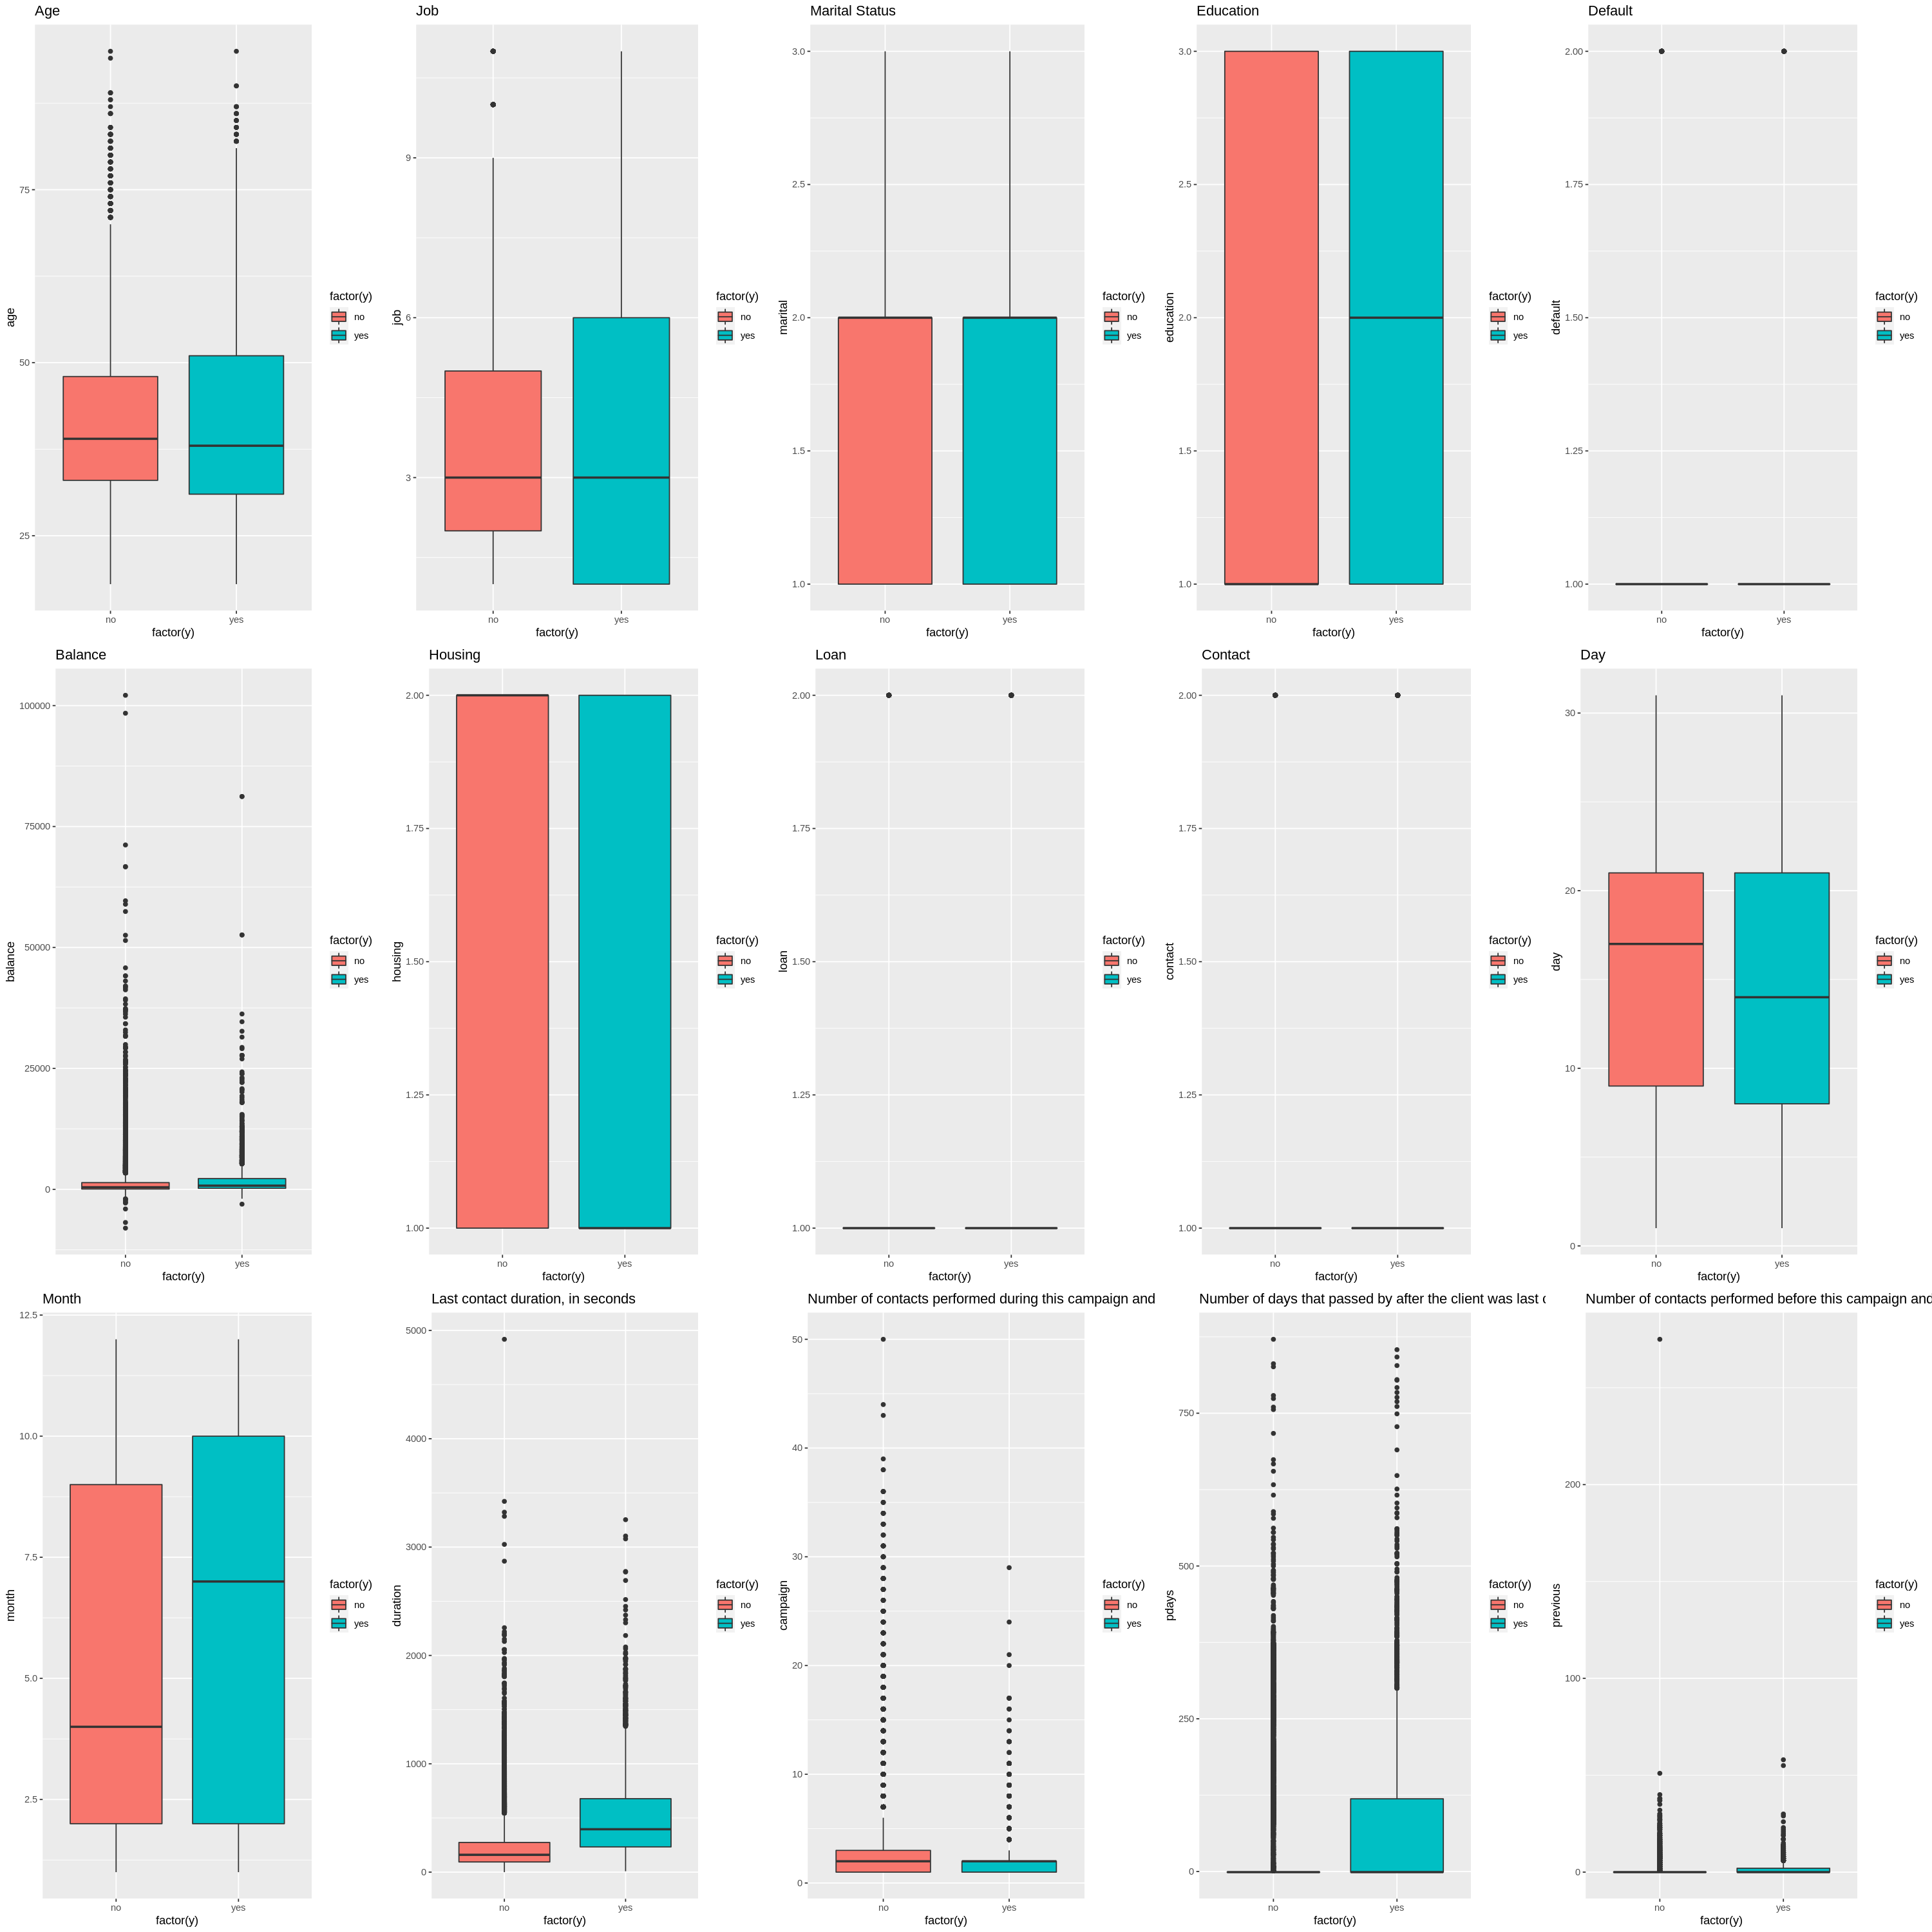

In [4]:
library(gridExtra)
options(repr.plot.width=25, repr.plot.height=25)

#Graph for Age
p_age <- ggplot(bank_data_nums, aes(factor(y), age)) + geom_boxplot(aes(fill = factor(y))) + 
ggtitle("Age")

#Graph for Job
p_job <- ggplot(bank_data_nums, aes(factor(y), job)) + geom_boxplot(aes(fill = factor(y))) + 
ggtitle("Job")

#Graph Martial Status
p_marital <- ggplot(bank_data_nums, aes(factor(y), marital)) + geom_boxplot(aes(fill = factor(y)))+ 
ggtitle("Marital Status")

#Graph Education
p_education <- ggplot(bank_data_nums, aes(factor(y), education)) + geom_boxplot(aes(fill = factor(y)))+ 
ggtitle("Education")

#Graph Default
p_default <- ggplot(bank_data_nums, aes(factor(y), default)) + geom_boxplot(aes(fill = factor(y)))+ 
ggtitle("Default")

#Graph Balance
p_balance <- ggplot(bank_data_nums, aes(factor(y), balance)) + geom_boxplot(aes(fill = factor(y)))+ 
ggtitle("Balance")

#Graph Housing
p_housing <- ggplot(bank_data_nums, aes(factor(y), housing)) + geom_boxplot(aes(fill = factor(y)))+ 
ggtitle("Housing")

#Graph Loan
p_loan <- ggplot(bank_data_nums, aes(factor(y), loan)) + geom_boxplot(aes(fill = factor(y)))+ 
ggtitle("Loan")

#Graph Contact
p_contact <- ggplot(bank_data_nums, aes(factor(y), contact)) + geom_boxplot(aes(fill = factor(y)))+ 
ggtitle("Contact")

#Graph Day
p_day <- ggplot(bank_data_nums, aes(factor(y), day)) + geom_boxplot(aes(fill = factor(y)))+ 
ggtitle("Day")

#Graph Month
p_month <- ggplot(bank_data_nums, aes(factor(y), month)) + geom_boxplot(aes(fill = factor(y)))+ 
ggtitle("Month")

#Graph Last contact duration
p_duration <- ggplot(bank_data_nums, aes(factor(y), duration)) + geom_boxplot(aes(fill = factor(y)))+ 
ggtitle("Last contact duration, in seconds")

#Graph Campaign
p_campaign <- ggplot(bank_data_nums, aes(factor(y), campaign)) + geom_boxplot(aes(fill = factor(y)))+ 
ggtitle("Number of contacts performed during this campaign and for this client")

#Graph Pdays
p_pdays <- ggplot(bank_data_nums, aes(factor(y), pdays)) + geom_boxplot(aes(fill = factor(y)))+ 
ggtitle("Number of days that passed by after the client was last contacted from a previous campaign")

#Graph Previous
p_previous <- ggplot(bank_data_nums, aes(factor(y), previous)) + geom_boxplot(aes(fill = factor(y)))+ 
ggtitle("Number of contacts performed before this campaign and for this client")

grid.arrange(p_age,
             p_job,
             p_marital,
             p_education,
             p_default,
             p_balance,
             p_housing,
             p_loan,
             p_contact,
             p_day,
             p_month,
             p_duration,
             p_campaign,
             p_pdays,
             p_previous,
             nrow = 3)

In [5]:
# Find the number of occurrences of each value of y to determine if there is a class imbalance
total_rows <- nrow(bank_data_filtered)
y_occurrence <- bank_data_filtered %>%
    group_by(y) %>%
    summarize(n = n(), n_percent = n()/total_rows)
y_occurrence

# We can see that there are many more occurrences of "no" compared to "yes", so we need to upsample "yes" in our training data later on

#density_plot1 <- ggplot(bank_data_filtered, aes(x=age))+ geom_density(color="darkblue", fill="lightblue")
#density_plot1
#density_plot2 <- ggplot(bank_data_filtered, aes(x=duration))+ geom_density(color="darkblue", fill="lightgreen")
#density_plot2

`summarise()` ungrouping output (override with `.groups` argument)



y,n,n_percent
<chr>,<int>,<dbl>
no,26394,0.8539813
yes,4513,0.1460187


In [6]:
#Still have error exists here in this section of code
library(GGally)
options(repr.plot.width=18, repr.plot.height=18)
bank_scaled_data <- recipe(y ~ ., data = bank_data_nums) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) %>%
    prep() %>%
    bake(bank_data_nums)

predictor_means <- bank_scaled_data %>%
   group_by(y) %>%
   summarize(across(age:previous, mean))
predictor_means

predictor_means %>%
    select(age:previous) %>%
    tibble::rownames_to_column() %>%  
    pivot_longer(-rowname) %>% 
    pivot_wider(names_from=rowname, values_from=value) %>%
    mutate(diff=abs(`1` - `2`)) %>%
    arrange(desc(diff))

#bank_data_sample <- rep_sample_n(bank_data_nums, 5000)
#plot_pairs <- bank_data_sample %>%
#  ggpairs +
#  theme(text = element_text(size = 20))
#plot_pairs

`summarise()` ungrouping output (override with `.groups` argument)



y,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no,-0.01287563,-0.02944137,0.02018594,-0.02035687,0.01203573,-0.02269455,0.05519222,0.03481345,0.005825785,0.01913188,-0.04710326,-0.1634884,0.03737813,-0.02962375,-0.03121084
yes,0.07530230,0.17218602,-0.11805623,0.11905592,-0.07039021,0.13272766,-0.32278829,-0.20360432,-0.034071743,-0.11189162,0.27548051,0.9561520,-0.21860368,0.17325263,0.18253465


name,1,2,diff
<chr>,<dbl>,<dbl>,<dbl>
duration,-0.16348844,0.9561520,1.1196404
housing,0.05519222,-0.3227883,0.3779805
month,-0.04710326,0.2754805,0.3225838
campaign,0.03737813,-0.2186037,0.2559818
loan,0.03481345,-0.2036043,0.2384178
⋮,⋮,⋮,⋮
marital,0.020185943,-0.11805623,0.13824217
day,0.019131881,-0.11189162,0.13102350
age,-0.012875627,0.07530230,0.08817793


From the plots and tables above, it's a bit difficult to determine which predictors should be chosen, but we can see that from the boxplots that 'duration' seems to have the largest difference in distribution between 'yes' and 'no', suggesting it may be a good predictor. We see this again in the above table which lists the difference in the mean values of each variable when grouped by the values of 'y'. 'Duration' has the largest difference in means by a significant amount, reinforcing it usefulness as a predictor. For our other predictors, we will use 'housing', 'campaign', and 'balance'. We chose 'housing' and 'campaign' as they have large differences in means as well. On the other hand, 'balance' does not have as large a difference between its mean values, however since it's a numerical predictor while the others are categorical, it should help offset the inaccuracies caused by using categorical variables for classification. In addition, despite 'month' having a high difference in mean values as well, we will not include it as a predictor because the month of when the person was contacted does not seem to be important for our classification.

In [7]:
bank_data_filtered <- select(bank_data_nums, duration, housing, campaign, balance, y)

In [8]:
# Set the seed
set.seed(7134) 

# Split the dataset into training and testing sets
bank_split <- initial_split(bank_data_filtered, prop = 0.75, strata = y)  
bank_train <- training(bank_split)   
bank_test <- testing(bank_split)
bank_test
bank_train

bank_upscaled_train <- recipe(y ~ ., data = bank_train) %>%
    step_upsample(y, over_ratio=1, skip = FALSE) %>%
    prep() %>%
    bake(bank_train)

total_rows <- nrow(bank_upscaled_train)
validate_balance <- bank_upscaled_train %>%
    group_by(y) %>%
    summarize(n = n(), n_percent = n()/total_rows)
validate_balance

duration,housing,campaign,balance,y
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
668,1,2,105,no
178,1,2,1146,no
273,1,3,187,no
125,1,2,93,no
615,1,2,216,yes
⋮,⋮,⋮,⋮,⋮
482,2,1,1224,yes
414,1,2,3409,no
401,1,2,133,yes


duration,housing,campaign,balance,y
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
255,1,1,35,no
297,1,1,466,no
65,1,2,19,no
436,2,4,126,no
1044,2,3,-127,yes
⋮,⋮,⋮,⋮,⋮
977,1,3,825,yes
456,1,2,1729,yes
1127,1,5,5715,yes


Warning message:
“`step_upsample()` is deprecated as of recipes 0.1.13.
Please use `themis::step_upsample()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
`summarise()` ungrouping output (override with `.groups` argument)



y,n,n_percent
<fct>,<int>,<dbl>
no,19796,0.5
yes,19796,0.5


In [9]:
# Perform cross validation to determine the ideal # of neighbours

# Set the seed
set.seed(7134) 

# No need to use the entire dataset for this, 
# especially since cross validation would take too long on a datset so large
bank_sample <- rep_sample_n(bank_upscaled_train, 1000)

bank_k_recipe <- recipe(y ~ duration+housing+campaign+balance, data = bank_sample) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

bank_vfold <- vfold_cv(bank_sample, v = 5, strata = y)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [10]:
# Set the seed
set.seed(7134) 
bank_knn_results <- workflow() %>%
       add_recipe(bank_k_recipe) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = bank_vfold, grid = 20) %>%
       collect_metrics()
bank_knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.6820735,5,0.02075267,Model01
2,roc_auc,binary,0.7521421,5,0.02034670,Model01
3,accuracy,binary,0.7410197,5,0.01579327,Model02
3,roc_auc,binary,0.7737156,5,0.01694293,Model02
4,accuracy,binary,0.7410197,5,0.01579327,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
13,roc_auc,binary,0.8227925,5,0.01309291,Model12
14,accuracy,binary,0.7620603,5,0.01193919,Model13
14,roc_auc,binary,0.8240886,5,0.01309278,Model13


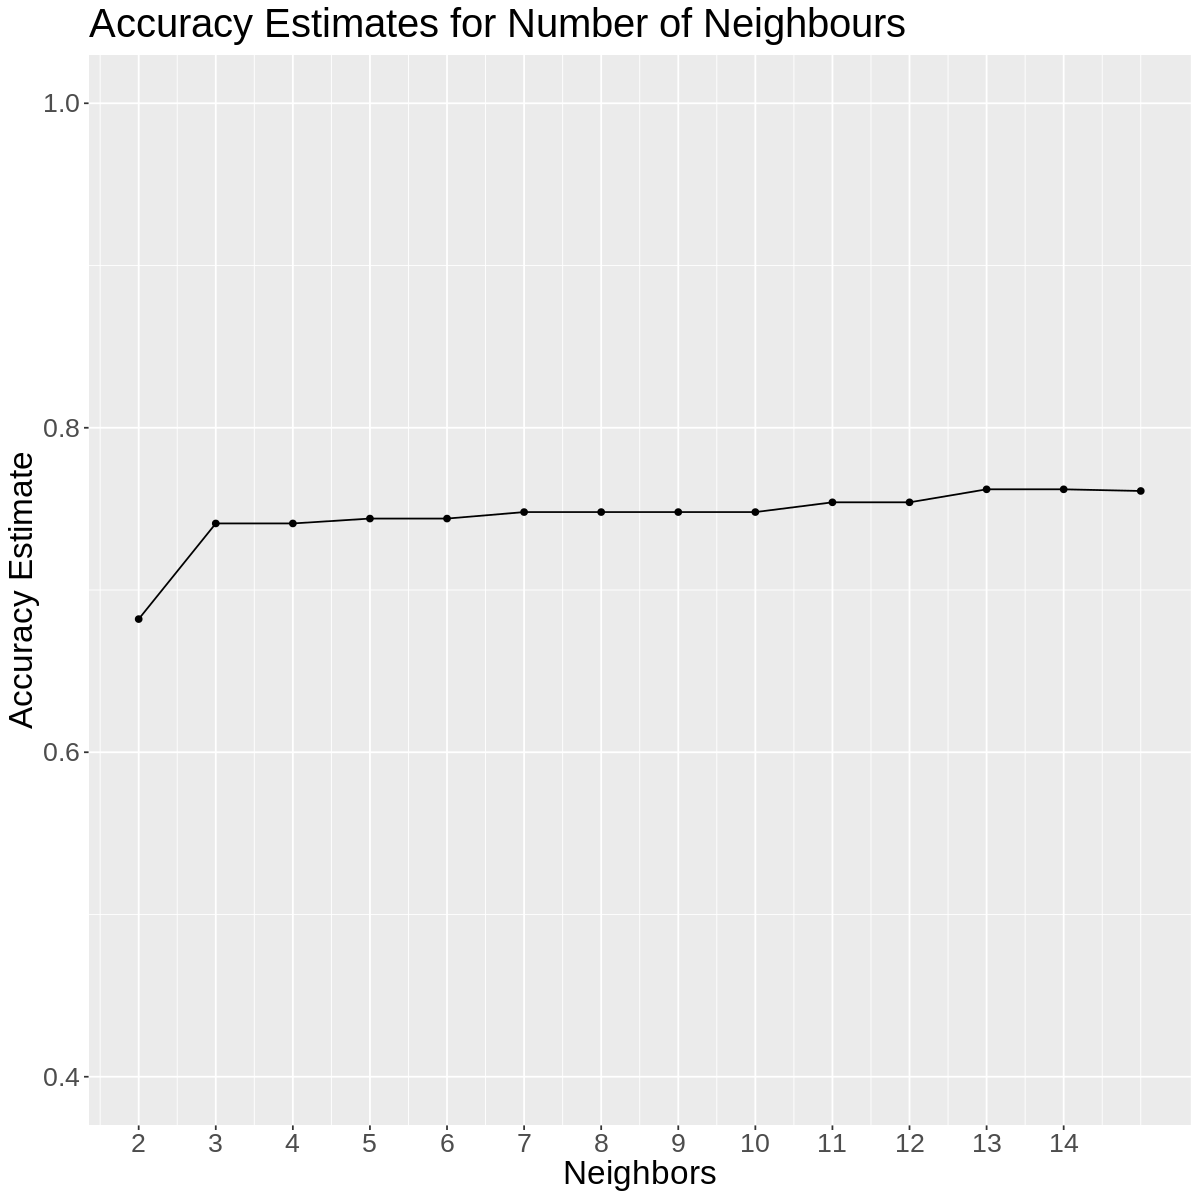

In [11]:
# Plot the accuracies of each k determined by cross validation
# to find the ideal value of k
options(repr.plot.width=10, repr.plot.height=10)

accuracies <- bank_knn_results %>% 
       filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Accuracy Estimates for Number of Neighbours") +
       theme(text = element_text(size = 20)) +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis

accuracy_versus_k

In [8]:
# Comments from the TA
# How can we make sure the data does not include any missing values? Make sure to include a code checking for missing data. 

From the above plot, we can see that the accuracy increases greatly from k=2 to k=3, and from there increases slowly up until k=11. The increase in accuracy from k=3 to k=11 is not very large, while the increase in neighbours would greatly increase the amount of computation needed, therefore we will choose k=3.

In [12]:
bank_recipe <- recipe(y ~ duration+housing+campaign+balance, data = bank_upscaled_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())
bank_recipe

bank_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
       set_engine("kknn") %>%
       set_mode("classification")

bank_spec

bank_fit <- workflow() %>%
        add_recipe(bank_recipe) %>%
        add_model(bank_spec) %>%
        fit(data = bank_upscaled_train)
bank_fit

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Operations:

Scaling for all_predictors()
Centering for all_predictors()

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 3
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~3, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.09779753
Best kernel: rectangular
Best k: 3

.pred_class,duration,housing,campaign,balance,y
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
yes,668,1,2,105,no
no,178,1,2,1146,no
no,273,1,3,187,no
no,125,1,2,93,no
yes,615,1,2,216,yes
⋮,⋮,⋮,⋮,⋮,⋮
yes,482,2,1,1224,yes
yes,414,1,2,3409,no
yes,401,1,2,133,yes


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7643024
kap,binary,0.2484307


          Truth
Prediction   no  yes
       no  5337  560
       yes 1261  568

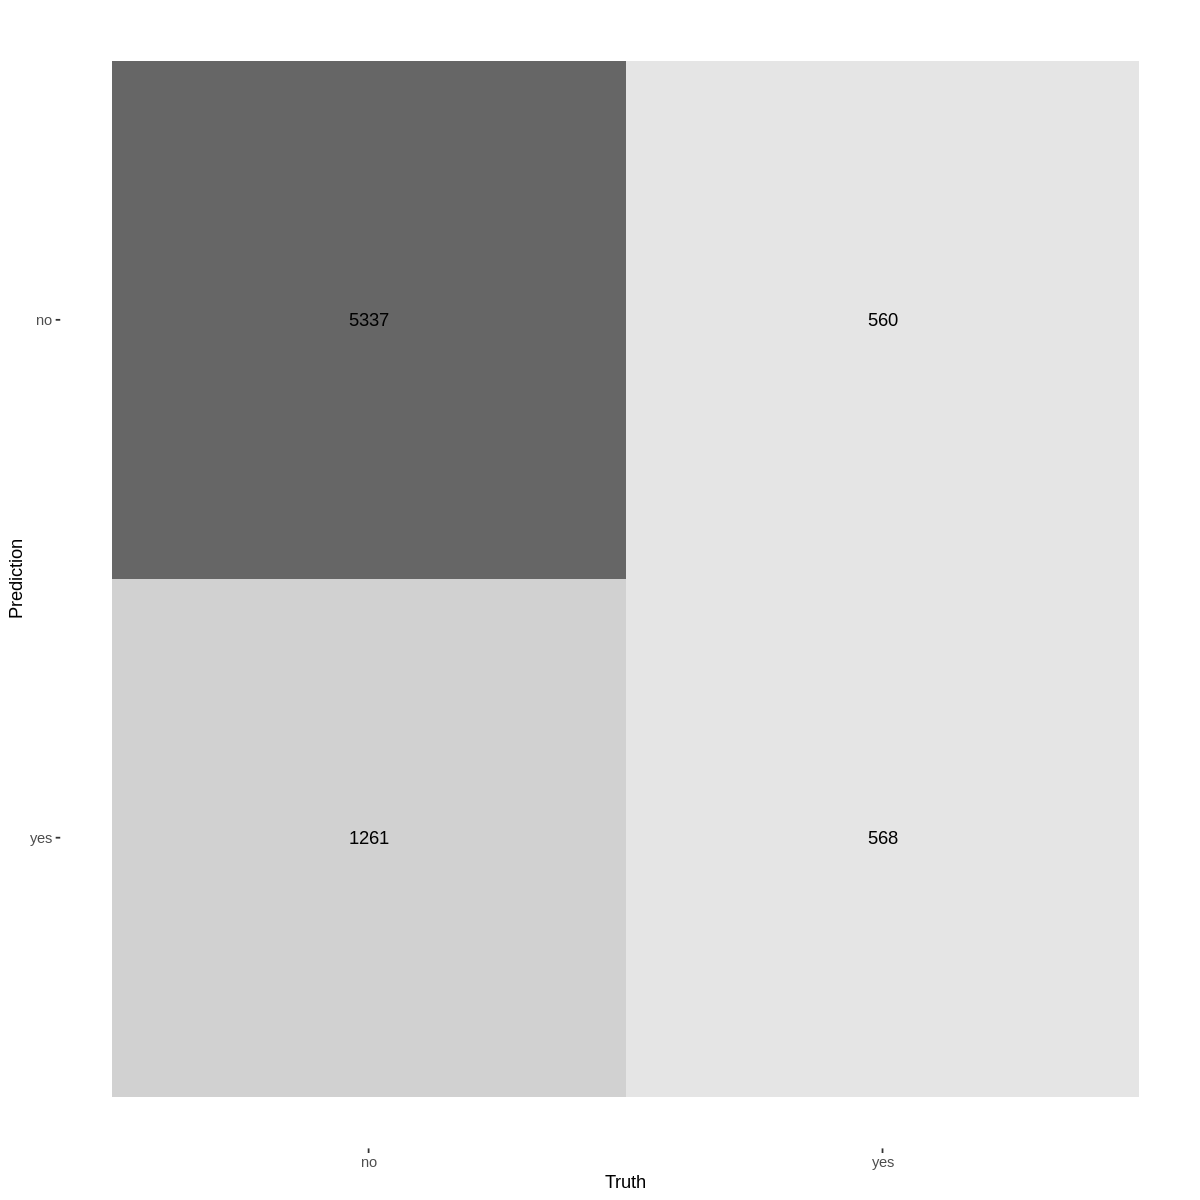

In [13]:
bank_predictions <- predict(bank_fit , bank_test) %>%
       bind_cols(bank_test)
bank_predictions

bank_metrics <- bank_predictions %>%
         metrics(truth = y, estimate = .pred_class)
bank_metrics

bank_conf_mat <- bank_predictions %>% 
       conf_mat(truth = y, estimate = .pred_class)
bank_conf_mat

autoplot(bank_conf_mat, type = "heatmap")

In [24]:
duration_counts = bank_data_nums %>% 
     group_by(duration=cut(duration, breaks= seq(0, 1600, by = 100)) ) %>% 
     summarise(n= n()) %>%
     arrange(as.numeric(duration))
duration_counts

housing_counts <- bank_data_nums %>%
    group_by(housing, y) %>%
    summarize(n = n()) %>%
    arrange(desc(n))
housing_counts

campaign_counts <- bank_data_nums %>%
    group_by(campaign, y) %>%
    summarize(n = n()) %>%
    arrange(desc(n))
campaign_counts

balance_counts <- bank_data_nums %>%
    group_by(balance=cut(balance, breaks= seq(-8019, 102127, by = 5000)) ) %>% 
    summarize(n = n()) %>%
    arrange(desc(n))
balance_counts

`summarise()` ungrouping output (override with `.groups` argument)



duration,n
<fct>,<int>
"(0,100]",7341
"(100,200]",9582
"(200,300]",5465
"(300,400]",3038
"(400,500]",1704
⋮,⋮
"(1.2e+03,1.3e+03]",95
"(1.3e+03,1.4e+03]",73
"(1.4e+03,1.5e+03]",65


`summarise()` regrouping output by 'housing' (override with `.groups` argument)



housing,y,n
<dbl>,<fct>,<int>
2,no,13831
1,no,12563
1,yes,3001
2,yes,1512


`summarise()` regrouping output by 'campaign' (override with `.groups` argument)



campaign,y,n
<dbl>,<fct>,<int>
1,no,9611
2,no,7467
3,no,3113
4,no,2272
1,yes,2218
⋮,⋮,⋮
29,yes,1
39,no,1
43,no,1


`summarise()` ungrouping output (override with `.groups` argument)



balance,n
<fct>,<int>
"(-3.02e+03,1.98e+03]",24791
"(1.98e+03,6.98e+03]",4930
"(6.98e+03,1.2e+04]",758
"(1.2e+04,1.7e+04]",226
"(1.7e+04,2.2e+04]",84
⋮,⋮
"(7.7e+04,8.2e+04]",2
NA,2
"(4.7e+04,5.2e+04]",1


One weakness that we can identify from these tables is that our data is fairly imbalanced, with most of our data being for people who did not subscribe to a term deposit (i.e. the 'y' value was 'no'). This means that our predictor may not be as accurate as we think, since if our predictor was actually predicting 'no' excessively, our test data would still return a high accuracy. From our confusion matrix, we can see this characteristic in our predictor, as although it has a very high rate of predicting 'no' correctly, it was only able to predict 1261 'yes' data points correctly out of 1829 points. This would be an accuracy of ~69%, and while that isn't bad, it's a decent amount lower than the reported accuracy of 76% of our predictor. In addition, some of our predictors are imbalanced as well, such as duration being centered around values less than 500, and balance being mostly within \\$3000 of \\$0. Although our classifier has high accuracy for our current data, it may not be as accurate for data with values that are significantly different than our current data. However, this is not a large concern, as these outliers will not be too common, and we are more interested in being able to predict 

<h2> Discussion </h2>
Summarize what you found
Discuss whether this is what you expected to find?
Discuss what impact could such findings have?
Discuss what future questions could this lead to?

<h2> References </h2>